HELLO,
This is a Sentiment Analysis project using Natural Language Processing(NLP).
Here data was obtained from Kaggle which contained the tweets(tweets made by thousands of people), labels(the sentiment of people which are in zero's (0) and one's (1) where zero means the person is angry or sad or basically something negative while the one means a positive tweet and the id(which of course is irrelevant to us).
The aim of this project is to use Naive Bays model to test and train the dataset to find the unknown class(data) prediction
the steps taken are:
1. install packages necessary for the completion of this project(wordcloud,jupyterthemes,nltk)
2. import all the libraries needed
3. Read the data on a CSV file
4. EDA(Exploratory Data Analysis) which involves the statistical calcyultion,graphical represenation and dropping of irrelevant tables)
5. using worldcloud as a data visualization technique used in representing text data in which the size of each word indicates it frequency or importance. so this was done for the data to know which of the tweets was more than the other whether negative was more than positive
6. Cleaning of the data(removing punctuations and stop words) and converting it to an array
7. Testing and training of the data that hasbeen cleaned and converted to an array


Installation of jupyter themes which helps in the customization of your data outcome

In [5]:

pip install jupyterthemes

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Importing libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

USING PANDAS TO READ THE DATASET

In [7]:
df=pd.read_csv("twitter.csv")

In [8]:
df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

EDA(Exploratory Data Analytics) WHICH WAS USED TO SUMARIZE THE MAIN CHARACTERISTICS OF THE DATA USING STATISTICAL GRAPHICS AND VISUALIZATION 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [7]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [8]:
df= df.drop(['id'], axis=1)

In [9]:
df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

To check if there is are null values,i tried plotting the graph for a better description but guess what ....... no null value we just keep plotting to get other information.

<AxesSubplot:>

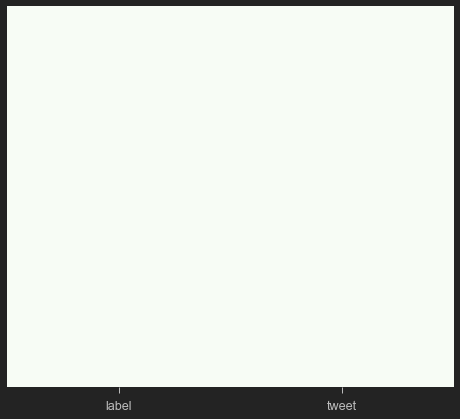

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Greens")

This is a graphical representationn showing that there are many positive tweets than the negative tweets

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

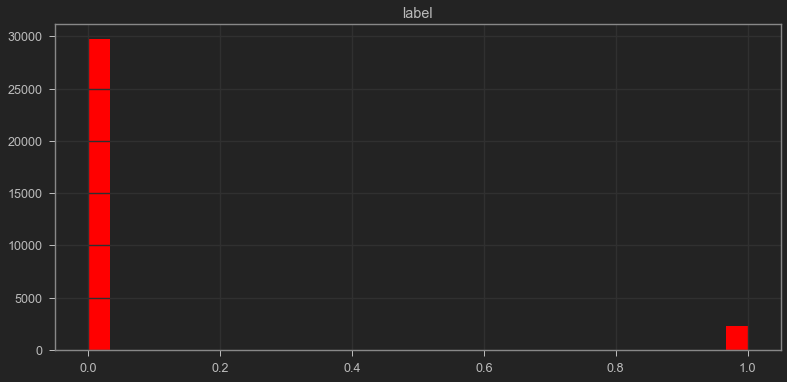

In [11]:
df.hist(bins=30, figsize= (13,6), color= 'red')

To get a better and broader view of the labels we used seaborn to plot it again 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

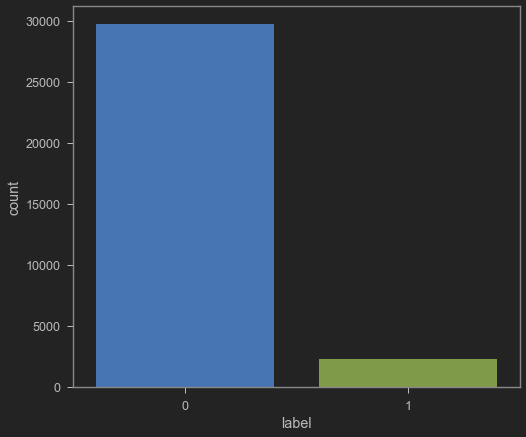

In [12]:
sns.countplot(df['label'],label='Count')

A new column was created known as length which is used too know the length of each tweet

In [ ]:
df["length"]=df['tweet'].apply(len)
df

Describe is used to calculate the ststistics of the data and with length added to the list we can easily access the tweet with the largest and lowest comment and the average tweet and other statistical stuff

In [14]:
df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

Acesssing the data/tweets using their index and length plotting a histogram graph to determing which has the largest number of tweets

In [9]:
df[df["length"]==11]["tweet"]

KeyError: 'length'

In [ ]:
df[df["length"]==84]["tweet"].iloc[0]

<AxesSubplot:ylabel='Frequency'>

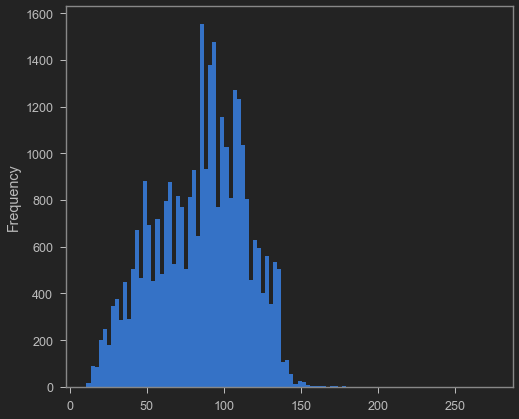

In [17]:
df["length"].plot(bins=100,kind="hist")

The positive and negative tweets 

In [18]:
pos=df[df["label"]==0]
pos

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [19]:
neg=df[df["label"]==1]
neg

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

For the word cloud to show we have to combine all the tweets together so as to have a better description on the wordcloud

In [20]:
sentences = df['tweet'].tolist()
len(sentences)

31962

In [21]:
sentences_join = "".join(sentences)

In [22]:
sentences_join

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked  bihday your majesty#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦   factsguide: society now    #motivation[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo   @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girlwe won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦  @user @user welcome here !  i\'m   it\'s so #gr8 !  â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2%

In [23]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [24]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


wordcloud was created for all the tweets ,then for positive and negative tweets seperately

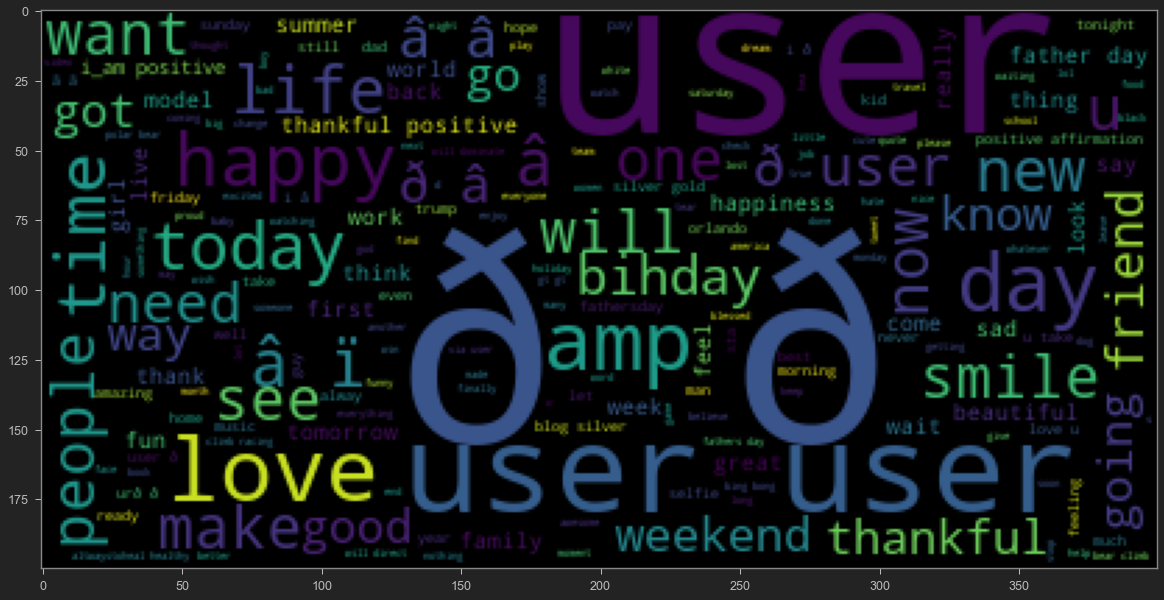

In [25]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_join))

In [26]:
neg_a=neg['tweet'].tolist()

In [27]:
neg_join = "".join(neg_a)
neg_join

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot  no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphinsretweet if you agree! @user @user lumpy says i am a . prove it lumpy.it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia @user lets fight against  #love #peace ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness  @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦@user why not @user mocked obama for being black.  @user @user @user @user #brexit#people aren\'t protesting #trump because a #republican won-they do so because trump has fuhered  &amp;â

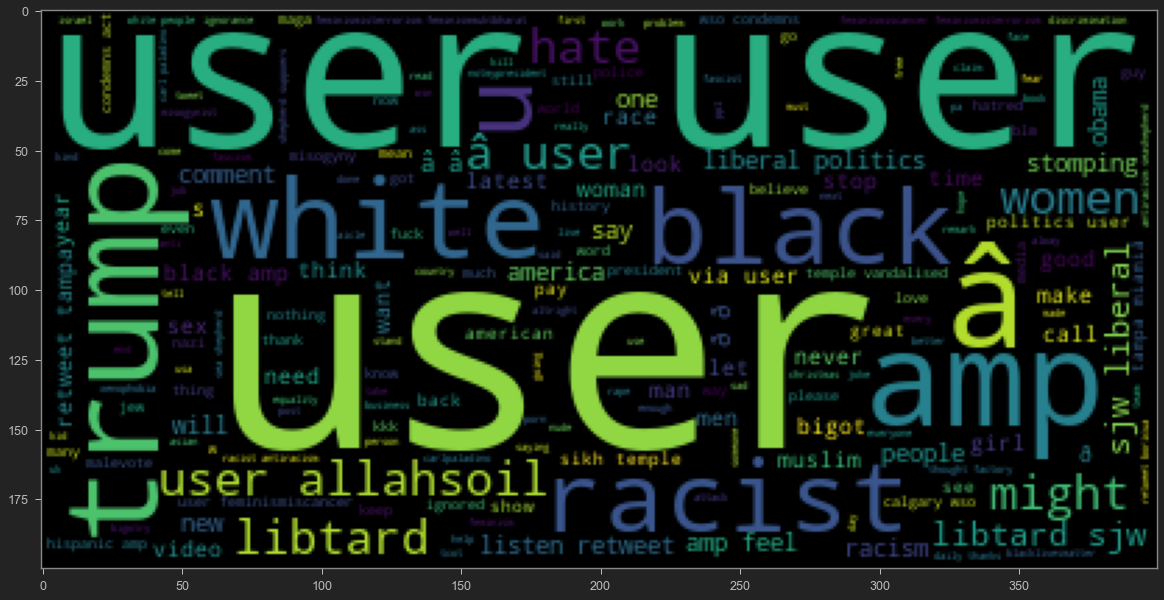

In [28]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_join))

DATA CLEANING
Removing string and stop words and converting it to an aaray

In [29]:
import string

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
Test = "?!Ilove my Mum a whole lot"
test_punc = [char  for char in Test  if char not in string.punctuation]
test_punc_final = "".join(test_punc)
test_punc_final

'Ilove my Mum a whole lot'

In [32]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
test_b = "i enjoy my life because it is filled with joy and i am happy about that"
test_b_final = [char for char in test_b.split() if char.lower() not  in stopwords.words('english')]

In [35]:
test_b_final

['enjoy', 'life', 'filled', 'joy', 'happy']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
sample=["My professional goals are to learn as much as I can about higher education that would strengthen my awareness about trends within the field and how I can contribute to the overall mission and purpose of the profession. I would like to someday become a dean of students or vice president for student services or student affairs as well as a faculty member. I believe my past and current experiences have prepared me tremendously to serve as a senior level administrator."]
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sample)

In [41]:
print(vectorizer.get_feature_names())

['about', 'administrator', 'affairs', 'and', 'are', 'as', 'awareness', 'become', 'believe', 'can', 'contribute', 'current', 'dean', 'education', 'experiences', 'faculty', 'field', 'for', 'goals', 'have', 'higher', 'how', 'learn', 'level', 'like', 'me', 'member', 'mission', 'much', 'my', 'of', 'or', 'overall', 'past', 'prepared', 'president', 'profession', 'professional', 'purpose', 'senior', 'serve', 'services', 'someday', 'strengthen', 'student', 'students', 'that', 'the', 'to', 'tremendously', 'trends', 'vice', 'well', 'within', 'would']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
print(X.toarray())

[[2 1 1 3 1 5 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 1 1 1 1
  1 1 1 1 1 1 1 1 2 1 1 3 4 1 1 1 1 1 2]]


In [44]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [45]:
tweet_clean = df['tweet'].apply(message_cleaning)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_cv = vectorizer.fit_transform(df['tweet'])

In [77]:
print(vectorizer.get_feature_names())


['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [79]:
print(tweets_cv.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
tweets_cv.shape

(31962, 47386)

In [56]:
x=pd.DataFrame(tweets_cv.toarray())

In [57]:
x

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [58]:
y= df['label']

In [59]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [60]:
x.shape

(31962, 47386)

In [61]:
y.shape

(31962,)

Training and testing the dataset and making prediction using heatmap for better visualization

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

Visualization of confusion matrix with seaborn heatmap
1. The first part by the left shows true positive: which occurs when we predict an observation and it belongs to a particular class and the observation actually belongs to that class too
2. The first part by the right is the false positive which is the type 1 error; it occurs an observation is predicted and belongs to a certain class and the observation actually belongs to that class
3. The second left by the left shows false negative:when the observation predicted does not belong to a certain class but the observation belongs to a class
4. The second  right is the true negative: when we predict an observation and it does not belong to certain class and the observation actually belongs to the class.

<AxesSubplot:>

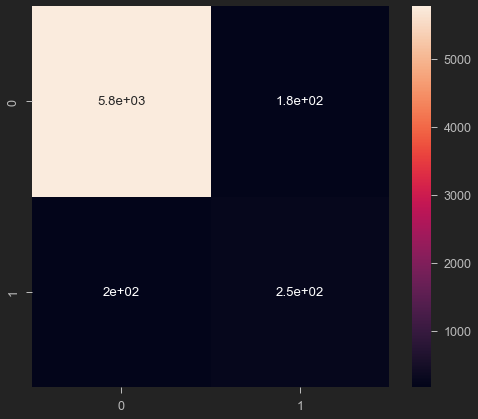

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

The classification of the report from which contains the precision,recall(which is the percentage of correctly predicted positive outcomes out of the actual posiitive outcomes),f1-score (weighted harmonic mean of precision and recall);the best would be a 1.0 but we have a 0.97 meaning we are close to it,support(actual number of occurrences  of the class in a dataset.
this shows that for the positive 0 we have higher precision ,recall and f1-score compared to the negative.

In [69]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5947
           1       0.59      0.56      0.58       446

    accuracy                           0.94      6393
   macro avg       0.78      0.77      0.77      6393
weighted avg       0.94      0.94      0.94      6393

